In [49]:
from pynwb import NWBFile, TimeSeries, NWBHDF5IO
from pynwb.core import NWBContainer, NWBDataInterface
from pynwb.spec import NWBGroupSpec
import matplotlib.pyplot as plt
import ghostipy as gsp
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
io = NWBHDF5IO('/Users/elijahc/data/emu/patient2535.nwb', 'r')
f = io.read()

In [3]:
dat = f.processing.get('ecephys')
dat

ecephys pynwb.base.ProcessingModule at 0x5167394320
Fields:
  data_interfaces: {
    EKG <class 'pynwb.ecephys.ElectricalSeries'>,
    F8 <class 'pynwb.ecephys.ElectricalSeries'>,
    FP2 <class 'pynwb.ecephys.ElectricalSeries'>,
    LAC <class 'pynwb.ecephys.ElectricalSeries'>,
    LAH <class 'pynwb.ecephys.ElectricalSeries'>,
    LAI <class 'pynwb.ecephys.ElectricalSeries'>,
    LAmy <class 'pynwb.ecephys.ElectricalSeries'>,
    LOF <class 'pynwb.ecephys.ElectricalSeries'>,
    LOcc <class 'pynwb.ecephys.ElectricalSeries'>,
    LPC <class 'pynwb.ecephys.ElectricalSeries'>,
    LPH <class 'pynwb.ecephys.ElectricalSeries'>,
    LPI <class 'pynwb.ecephys.ElectricalSeries'>,
    Lpar <class 'pynwb.ecephys.ElectricalSeries'>,
    O2 <class 'pynwb.ecephys.ElectricalSeries'>,
    T4 <class 'pynwb.ecephys.ElectricalSeries'>,
    T6 <class 'pynwb.ecephys.ElectricalSeries'>,
    TRSH <class 'pynwb.ecephys.ElectricalSeries'>
  }
  description: Preprocessed stereo EEG data

In [4]:
f.create_processing_module(
    name='medication',
    description='Medication administration data')

medication pynwb.base.ProcessingModule at 0x5168003472
Fields:
  description: Medication administration data

In [5]:
f.processing.add()

{'ecephys': ecephys pynwb.base.ProcessingModule at 0x5167394320
 Fields:
   data_interfaces: {
     EKG <class 'pynwb.ecephys.ElectricalSeries'>,
     F8 <class 'pynwb.ecephys.ElectricalSeries'>,
     FP2 <class 'pynwb.ecephys.ElectricalSeries'>,
     LAC <class 'pynwb.ecephys.ElectricalSeries'>,
     LAH <class 'pynwb.ecephys.ElectricalSeries'>,
     LAI <class 'pynwb.ecephys.ElectricalSeries'>,
     LAmy <class 'pynwb.ecephys.ElectricalSeries'>,
     LOF <class 'pynwb.ecephys.ElectricalSeries'>,
     LOcc <class 'pynwb.ecephys.ElectricalSeries'>,
     LPC <class 'pynwb.ecephys.ElectricalSeries'>,
     LPH <class 'pynwb.ecephys.ElectricalSeries'>,
     LPI <class 'pynwb.ecephys.ElectricalSeries'>,
     Lpar <class 'pynwb.ecephys.ElectricalSeries'>,
     O2 <class 'pynwb.ecephys.ElectricalSeries'>,
     T4 <class 'pynwb.ecephys.ElectricalSeries'>,
     T6 <class 'pynwb.ecephys.ElectricalSeries'>,
     TRSH <class 'pynwb.ecephys.ElectricalSeries'>
   }
   description: Preprocessed stere

In [6]:
d = dat.get('Lpar').data[()]

In [7]:
dat.get('Lpar')

Lpar pynwb.ecephys.ElectricalSeries at 0x5167665936
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (562970, 14), type "<f8">
  description: no description
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  rate: 400.0
  resolution: -1.0
  starting_time: 1592823840388885.0
  starting_time_unit: seconds
  unit: volts

In [8]:
d.shape

(562970, 14)

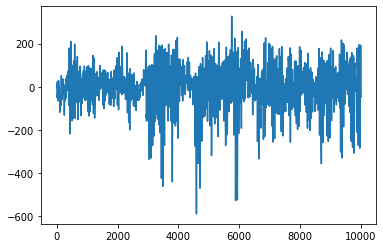

In [9]:
plt.plot(d[:10000,5])

In [10]:
ts_start = 1592823840388885.0

In [11]:
def plot_contact(name='Lpar', lead=5, nsamples=10000):
    fs_lfp = dat.get(name).rate
    ts = (np.arange(nsamples)/fs_lfp)
    LFP = dat.get(name).data[()][:nsamples,lead]
    gamma = 3 
    beta =  10 # decrease beta to improve temporal resolution
#     beta =  20

    cwtcoefs, _, freq, cwtts, _ = gsp.cwt(
        LFP, timestamps=ts, freq_limits=[1, 200], fs=fs_lfp,
        wavelet=gsp.MorseWavelet(gamma=gamma, beta=beta))

    cwt_power = cwtcoefs.imag**2 + cwtcoefs.real**2

    t_ax, f_ax = np.meshgrid(ts, freq)
    
    plt.rcParams.update({'axes.spines.right': False, 'axes.spines.top': False})
    fig, axes = plt.subplots(2, 1, figsize=(18, 6), sharex=True, 
                         gridspec_kw={'hspace':0.15, 'height_ratios':[0.8,0.2]})
    ax1, ax2 = axes

    ax1.pcolormesh(t_ax, f_ax, cwt_power, shading='gouraud', 
               cmap=plt.cm.viridis, vmin=0, vmax=6250)
    ax1.set_ylim(1, 200)
    ax1.set_ylabel("Frequency (Hz)")

    ax2.plot(ts, LFP, 'grey', linewidth=0.5)

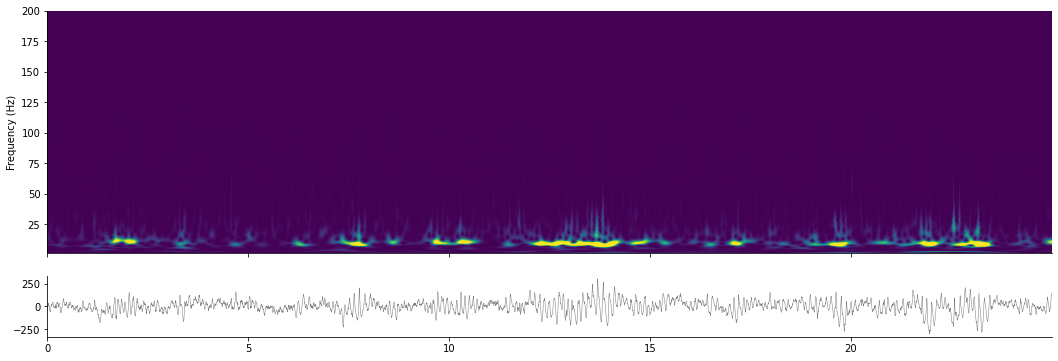

In [12]:
plot_contact(name='LAmy',lead=2)

In [13]:
fs_lfp = dat.get('LAmy').rate
ts = (np.arange(nsamples)/fs_lfp)
LFP = d[:nsamples,lead]
gamma = 3 
beta =  10 # decrease beta to improve temporal resolution
#     beta =  20

cwtcoefs, _, freq, cwtts, _ = gsp.cwt(
    LFP, timestamps=ts, freq_limits=[1, 200], fs=fs_lfp,
    wavelet=gsp.MorseWavelet(gamma=gamma, beta=beta))

NameError: name 'nsamples' is not defined

In [ ]:
t = np.arange(0,562970)/400.0
t = t+(ts_start/1000/1000)
# dat.get('LOF')

In [ ]:
t

In [ ]:
datetime.fromtimestamp(ts_start/1000/1000)

In [14]:
from emu.meds import Levetiracetam, Pregabalin, Lamotrigine

In [15]:
df = pd.read_csv('/Users/elijahc/data/emu/meds.2535.csv')

names = df.Med.unique().tolist()
dfs = [df.query('Med == "{}"'.format(n)) for n in df.Med.unique()]
basl = [1500,150,250]
meds = []

# Make a medication dosing regimen for each med
for c,d,b in zip([Levetiracetam,Pregabalin,Lamotrigine],dfs,basl):
    m = c.create_administration(doses=d.AMT,times=d.hour-8,weight=80)
    
    # Calculate steady state Cp for each medication using set_baseline()
    m.set_baseline(dose=b,interval=12)
    meds.append(m)

In [16]:
med_ts = []
for d in dfs: 
    ts = TimeSeries(
        name=d['Med'].unique()[0],
        data=d.AMT.values,
        timestamps=[pd.to_datetime(dt).timestamp() for dt in d.date],
        unit='mg'
    )
    med_ts.append(ts)

In [54]:
f.create_processing_module('med_admin','Medication administration data')

med_admin pynwb.base.ProcessingModule at 0x5193857872
Fields:
  description: Medication administration data

In [55]:
f.processing['med_admin'].add(med_ts[0])

Levetiracetam pynwb.base.TimeSeries at 0x5197475344
Fields:
  comments: no comments
  conversion: 1.0
  data: [1500 1500  750 1500 1500 1500 1500]
  description: no description
  interval: 1
  resolution: -1.0
  timestamps: [1.59251352e+09 1.59255846e+09 1.59260220e+09 1.59285570e+09
 1.59290148e+09 1.59294510e+09 1.59298596e+09]
  timestamps_unit: seconds
  unit: mg

In [62]:
ma = f.processing['med_admin']

In [65]:
f

root pynwb.file.NWBFile at 0x5163973136
Fields:
  devices: {
    Neuralynx Cheetah Probe <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    EKG <class 'pynwb.ecephys.ElectrodeGroup'>,
    F8 <class 'pynwb.ecephys.ElectrodeGroup'>,
    FP2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    LAC <class 'pynwb.ecephys.ElectrodeGroup'>,
    LAH <class 'pynwb.ecephys.ElectrodeGroup'>,
    LAI <class 'pynwb.ecephys.ElectrodeGroup'>,
    LAmy <class 'pynwb.ecephys.ElectrodeGroup'>,
    LOF <class 'pynwb.ecephys.ElectrodeGroup'>,
    LOcc <class 'pynwb.ecephys.ElectrodeGroup'>,
    LPC <class 'pynwb.ecephys.ElectrodeGroup'>,
    LPH <class 'pynwb.ecephys.ElectrodeGroup'>,
    LPI <class 'pynwb.ecephys.ElectrodeGroup'>,
    Lpar <class 'pynwb.ecephys.ElectrodeGroup'>,
    O2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    T4 <class 'pynwb.ecephys.ElectrodeGroup'>,
    T6 <class 'pynwb.ecephys.ElectrodeGroup'>,
    TRSH <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdm

In [ ]:
dts = pd.to_datetime(dfs[0].date)

In [ ]:
dts[0].timestamp()

In [ ]:
t1 = pd.to_datetime('2020/6/18 20:18')
t1

In [ ]:
med_times_td = [pd.Timedelta(s,unit='s') for s in (m.times*60*60).values]

In [ ]:
[t1+s for s in med_times_td]

In [ ]:
td = (pd.to_datetime(ts_start*1000)-t1)
td = td.days*24 + td.seconds/60/60
# t = np.linspace(0,87.1576180555,int(500))
t = np.linspace(0,meds[0].times.max(),500)
cp = meds[0].C(t=t)
# meds[1].baseline = cp[-1]
plt.plot(t,cp)
plt.vlines(x=td,ymin=-0.5,ymax=cp.max(),colors='black')

In [ ]:
td+(562970/400.0/60/60)

In [ ]:
(t >= td) & (t <= (td+(562970/400.0/60/60)))

In [ ]:
datetime.fromtimestamp(m.times*60*60)

In [ ]:
t1

In [ ]:
datetime.fromtimestamp(ts_start/1000/1000)

In [ ]:
td = datetime.fromtimestamp(ts_start/1000/1000) - t1

In [ ]:
td

In [ ]:
m.C(t=np.linspace())

In [ ]:
pd.to_datetime(t*1000*1000*1000)